## Bibliothèques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import os

In [2]:
# Count the number of classes (dogs breeds)
path = "data"
list_of_breed = os.listdir(path)
print("Nombre de race :", (len(list_of_breed)))
print('\n')

# Affichage des noms des dossiers (classes) trouvés
print("Classes trouvées :")
for breed in list_of_breed:
    breed_name = breed.split('-')[-1].replace('_', ' ').title()
    print(f"- {breed_name}")

Nombre de race : 3


Classes trouvées :
- German Shepherd
- Silky Terrier
- Golden Retriever


In [3]:
# Créer le DataFrame avec toutes les informations en une seule fois
df = pd.DataFrame({
  'Id_name_breed': list_of_breed,
  'breed_name': [x.split('-')[1] for x in list_of_breed],
  'Id': [x.split('-')[0] for x in list_of_breed],
  'nb_pic': [len(os.listdir(os.path.join(path, name))) for name in list_of_breed]
})

# Afficher le DataFrame
display(df)

# Afficher le nombre total d'images
total_images = df["nb_pic"].sum()
print(f"\nLe nombre total des images est: {total_images}")

,Id_name_breed,breed_name,Id,nb_pic
0,n02106662-German_shepherd,German_shepherd,n02106662,152
1,n02097658-silky_terrier,silky_terrier,n02097658,183
2,n02099601-golden_retriever,golden_retriever,n02099601,150



Le nombre total des images est: 485


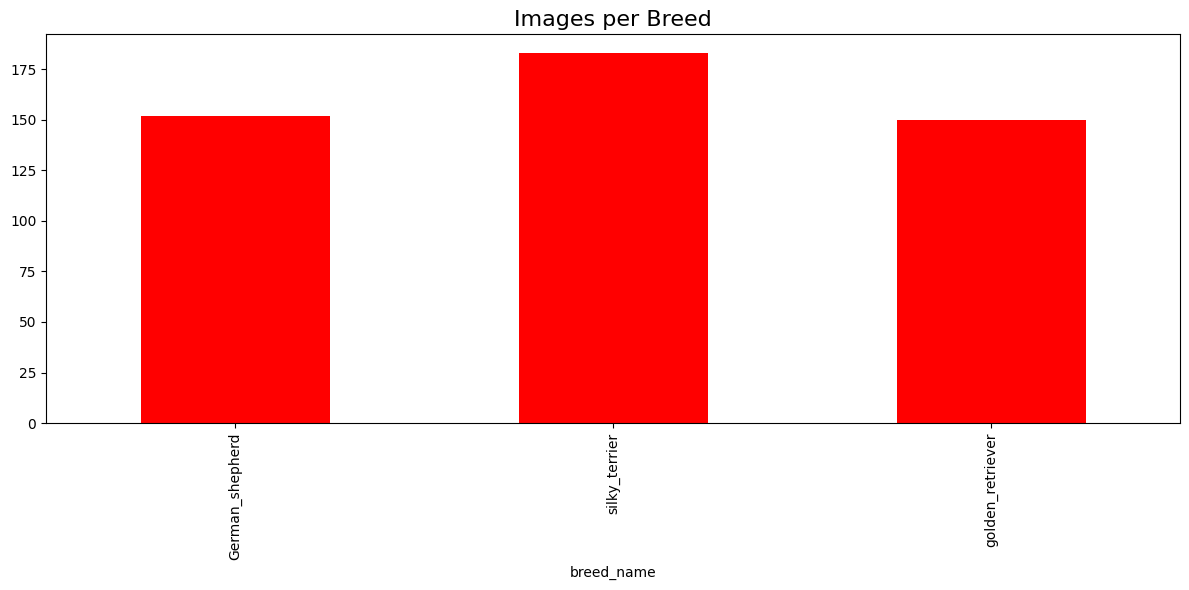

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
df.plot(x='breed_name', y='nb_pic', kind="bar", ax=ax, legend=False, color='red')
ax.set_title("Images per Breed", fontsize=16)
plt.tight_layout()
plt.show()

#### Remarque :
J'ai choisi 3 races de chiens comme demandé dans la recommandation, puisque prendre les 120 races demanderait plus de capacité de calcul que je n'en ai. Ce choix de limiter le nombre de races permet d'optimiser le temps d'entraînement et les ressources computationnelles, tout en offrant un échantillon diversifié pour démontrer l'efficacité du modèle. 

# Chargement d'un exemple d'image

Nous allons d'abord charger un exemple de photo d'un **golden retriever** (retriever doré), afficher les dimensions de l'image (`shape`), et vérifier qu'elle contient bien les 3 couches de couleurs **RGB**:


In [5]:
image_path = './data/n02099601-golden_retriever/n02099601_10.jpg'
img_array = utils.load_image(image_path)

L'image a été chargée avec la forme (334, 500, 3)


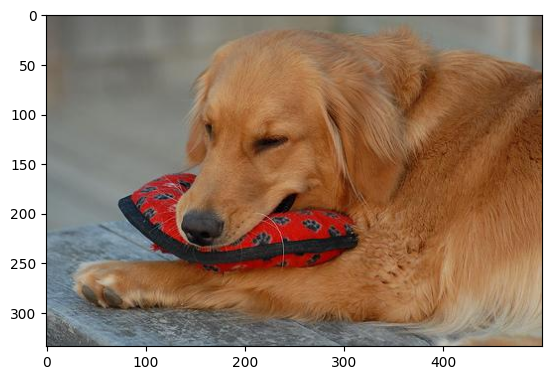

In [6]:
plt.imshow(np.uint8(img_array))

### Explication des Transformations Appliquées à l'Image

On va appliquer les transformations suivantes à la photo du golden retriever :

1. **Original** : L'image d'origine sans aucune transformation.

2. **Cropped** : Découpage d'une portion de l'image d'origine. Une sous-partie de l'image est sélectionnée entre les pixels (20, 20) et (180, 180), créant une image centrée plus petite.

3. **Mirrored (CV)** : Miroir horizontal (flip gauche-droite) réalisé avec OpenCV. L'image est retournée horizontalement, créant un effet miroir par rapport à l'axe vertical.

4. **Flipped Up-Down (TF)** : Flip vertical (haut-bas) réalisé avec TensorFlow. L'image est retournée verticalement, créant un effet miroir par rapport à l'axe horizontal.

5. **Whitened (Standardization)** : Blanchiment ou standardisation. Cette opération normalise les valeurs des pixels de l'image, de sorte que chaque pixel ait une moyenne de 0 et un écart-type de 1, homogénéisant ainsi les caractéristiques de l'image.

6. **Contrasted** : Ajustement du contraste. Le contraste de l'image est augmenté en utilisant un facteur de 2.0, rendant les zones sombres plus sombres et les zones claires plus claires.

7. **Equalized** : Égalisation de l'histogramme. Appliquée sur une image en niveaux de gris, cette opération redistribue les intensités lumineuses pour améliorer le contraste global de l'image.

8. **Denoised** : Débruitage de l'image. Cette transformation utilise OpenCV pour supprimer les artefacts et le bruit tout en conservant les détails importants, utile lorsque l'image est de mauvaise qualité ou bruitée.

9. **Resized** : Redimensionnement de l'image. L'image est redimensionnée à une taille de 224x224 pixels, une taille standard pour de nombreux modèles de vision par ordinateur.

10. **Rotated** : Rotation de l'image. L'image est tournée de 45 degrés autour de son centre.

11. **Brighter** : Ajustement de la luminosité. Cette transformation rend l'image plus lumineuse en augmentant les valeurs de pixel.

12. **Saturated** : Ajustement de la saturation. L'image est rendue plus saturée, ce qui intensifie les couleurs et les rend plus vives.

13. **Hue Adjusted** : Ajustement de la teinte. Cela modifie les couleurs de l'image en décalant légèrement la teinte, donnant à l'image une teinte différente.

14. **Zoomed** : Zoom dans l'image. Une fraction centrale de l'image est sélectionnée pour créer un effet de zoom (facteur de zoom de 1.2).

15. **Shifted** : Décalage de l'image. L'image est déplacée horizontalement et verticalement avec un remplissage des bords. Ce décalage est plus important que précédemment pour mieux illustrer l'effet de déplacement.

16. **Blurred** : Flou gaussien. Cette transformation applique un flou à l'image pour adoucir les détails et réduire le bruit. Elle est souvent utilisée pour le prétraitement ou la création d'effets visuels.

17. **Inverted** : Inversion des couleurs. Cette transformation inverse les couleurs de l'image, créant un effet de négatif.


In [7]:
# Appliquer les transformations
images, titles = utils.apply_transformations(img_array)

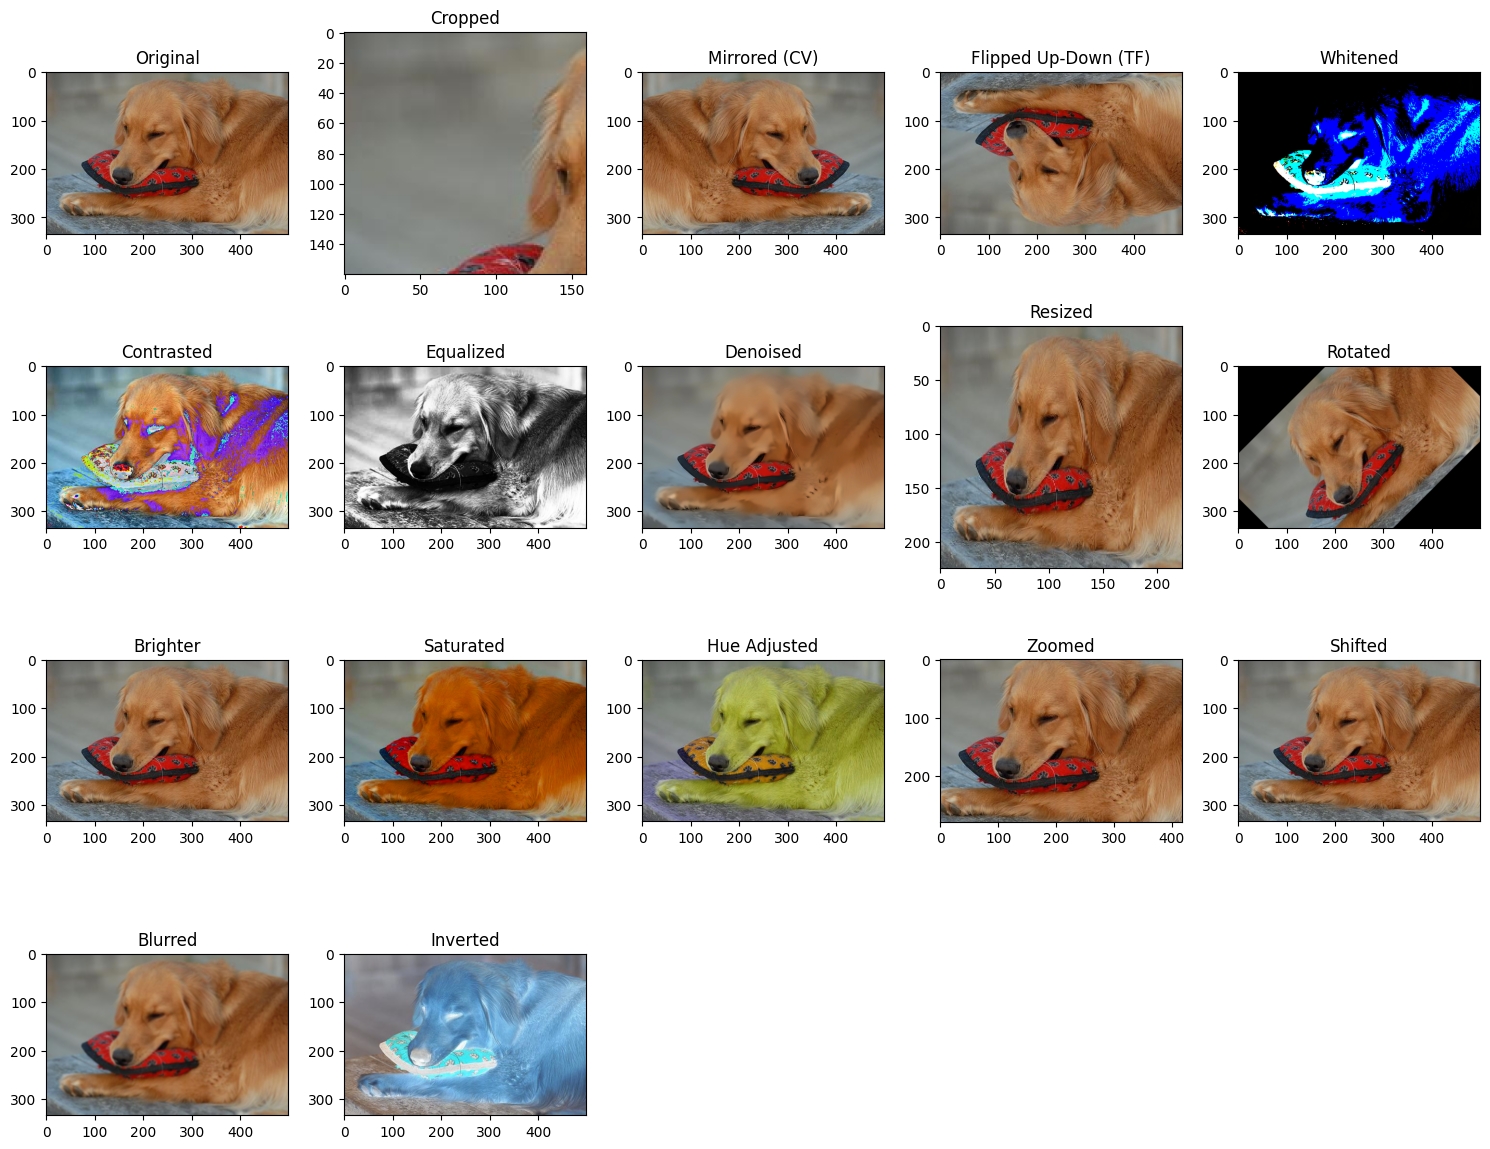

In [8]:
# Afficher les résultats
utils.display_images(images, titles)

### Conclusion :

Dans ce notebook, j'ai exploré diverses techniques de transformation d'images en utilisant la bibliothèque TensorFlow, telles que le redimensionnement, la rotation, le découpage, et l'égalisation. Ces transformations permettent non seulement de mieux comprendre la structure des images, mais aussi de préparer les données pour des tâches avancées comme l'entraînement de modèles de reconnaissance d'images. 

Ces outils sont particulièrement utiles pour l'augmentation de données, qui sera abordée dans les prochains notebooks. En appliquant ces techniques, je pourrai augmenter artificiellement la diversité des images de chiens par classe, un aspect crucial pour compenser le faible nombre d'exemples disponibles dans chaque catégorie. L'objectif est d'améliorer la robustesse et la performance du modèle lors de la phase d'entraînement, ce qui aura un impact direct sur la précision des prédictions futures.